# TensorFlow quickstart

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

Import TensorFlow into your program:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.max()

1.0

Check data shape and range

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train.max(), x_train.min(), x_test.max(), x_test.min()

(1.0, 0.0, 1.0, 0.0)

In [6]:
x_train[0].flatten().shape

(784,)

Randomly plot a grid of data points

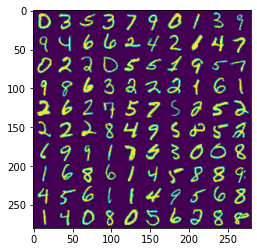

In [7]:
grid_size = 10
dim = x_train.shape[1]
selected = np.random.randint(x_train.shape[0], size=grid_size*grid_size)
data = np.zeros((dim*grid_size, dim*grid_size))
for i, sid in enumerate(selected):
    row = i // grid_size
    col = i % grid_size
    data[row*dim:(row+1)*dim, col*dim:(col+1)*dim] = x_train[sid]
    
%matplotlib inline
plt.imshow(data)
plt.show()

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train and evaluate the model:

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4010 - accuracy: 0.8838 - val_loss: 0.1909 - val_accuracy: 0.9450
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1938 - accuracy: 0.9430 - val_loss: 0.1415 - val_accuracy: 0.9567
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1476 - accuracy: 0.9566 - val_loss: 0.1115 - val_accuracy: 0.9667
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1213 - accuracy: 0.9640 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1035 - accuracy: 0.9690 - val_loss: 0.0886 - val_accuracy: 0.9722
313/313 - 0s - loss: 0.0886 - accuracy: 0.9722


[0.08860620856285095, 0.9721999764442444]

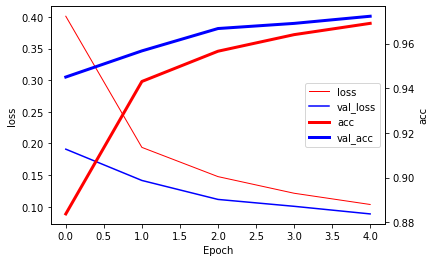

In [10]:
l1, = plt.plot(history.history['loss'], label='loss', color='red', linewidth=1)
l2, = plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('loss')
ax = plt.twinx()
l3, = ax.plot(history.history['accuracy'], label='acc', color='red', linewidth=3)
l4, = ax.plot(history.history['val_accuracy'], label='val_acc', color='blue', linewidth=3)
ax.set_ylabel('acc')

lines = [l1, l2, l3, l4]
plt.legend(lines,  [l.get_label() for l in lines], loc=5)
plt.show()

The image classifier is now trained to ~98% accuracy on this dataset. What happens if you change the dropout rate? And if you add more layers to the network? To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).